First we will create data frames of both the csv files (i.e historical_data.csv & fear_greed_index.csv), so that we can have a free hand on data and then  analysis the data. Now after creatig  data frames then we will normalize the dates in both data frames so that we can make them merdge and then we can get a bigger image of the data and can carry on the anlysis on both data sets easily.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# --- Reload datasets (or use the ones already loaded) ---
historical_df = pd.read_csv('historical_data.csv')
fear_greed_df = pd.read_csv('fear_greed_index.csv')

# --- Normalize dates in both ---
# Hyperliquid: convert timestamp (ms) to date
historical_df['Date'] = pd.to_datetime(historical_df['Timestamp'], unit='ms', errors='coerce').dt.normalize()

# Fear/Greed: detect format automatically or specify if known
fear_greed_df['Date'] = pd.to_datetime(fear_greed_df['date'], errors='coerce').dt.normalize()

# --- Drop unwanted columns ---
historical_df.drop(['Account', 'Coin', 'Trade ID', 'Transaction Hash', 'Order ID',], axis=1, inplace=True, errors='ignore')

# --- Check for date overlap ---
print("Overlap count:", historical_df['Date'].isin(fear_greed_df['Date']).sum())

# --- Merge ---
merged_df = pd.merge(
    historical_df,
    fear_greed_df[['Date', 'classification', 'value']],  # keep only relevant columns
    on='Date',
    how='left'
)





print(merged_df.head(5))


Overlap count: 184263
   Execution Price  Size Tokens  Size USD Side     Timestamp IST  \
0           7.9769       986.87   7872.16  BUY  02-12-2024 22:50   
1           7.9800        16.00    127.68  BUY  02-12-2024 22:50   
2           7.9855       144.09   1150.63  BUY  02-12-2024 22:50   
3           7.9874       142.98   1142.04  BUY  02-12-2024 22:50   
4           7.9894         8.73     69.75  BUY  02-12-2024 22:50   

   Start Position Direction  Closed PnL  Crossed       Fee     Timestamp  \
0        0.000000       Buy         0.0     True  0.345404  1.730000e+12   
1      986.524596       Buy         0.0     True  0.005600  1.730000e+12   
2     1002.518996       Buy         0.0     True  0.050431  1.730000e+12   
3     1146.558564       Buy         0.0     True  0.050043  1.730000e+12   
4     1289.488521       Buy         0.0     True  0.003055  1.730000e+12   

        Date classification  value  
0 2024-10-27          Greed   74.0  
1 2024-10-27          Greed   74.0  
2

Now first we will see number of trades on each classification whos code is written below and shows that trades are done the most in Fear days then any other days like Greed, Neutral, and Extreme Greed. The ratio of Fear vs Greed is 3.7 appx that means on Fear Days there is 3.7x trade done as compared to Greed Days.

---



In [ ]:
print(merged_df['classification'].value_counts(dropna=False))

classification
Fear             133871
Greed             36289
NaN               26961
Neutral            7141
Extreme Greed      6962
Name: count, dtype: int64


Now we will describe the merged data frame and find out count, mean,min,25%,50%,75%,max, and std (standard divation)

In [ ]:
print(merged_df.describe())

       Execution Price   Size Tokens      Size USD  Start Position  \
count    211224.000000  2.112240e+05  2.112240e+05    2.112240e+05   
mean      11414.723350  4.623365e+03  5.639451e+03   -2.994625e+04   
min           0.000005  8.740000e-07  0.000000e+00   -1.433463e+07   
25%           4.854700  2.940000e+00  1.937900e+02   -3.762311e+02   
50%          18.280000  3.200000e+01  5.970450e+02    8.472793e+01   
75%         101.580000  1.879025e+02  2.058960e+03    9.337278e+03   
max      109004.000000  1.582244e+07  3.921431e+06    3.050948e+07   
std       29447.654868  1.042729e+05  3.657514e+04    6.738074e+05   

          Closed PnL            Fee     Timestamp  \
count  211224.000000  211224.000000  2.112240e+05   
mean       48.749001       1.163967  1.737744e+12   
min   -117990.104100      -1.175712  1.680000e+12   
25%         0.000000       0.016121  1.740000e+12   
50%         0.000000       0.089578  1.740000e+12   
75%         5.792797       0.393811  1.740000e+12  

We will see number of Buys and Sells in each classification

In [ ]:
buy_counts = merged_df[merged_df['Side'].str.upper() == 'BUY'].groupby('classification')['Side'].count().sort_values(ascending=False)
print('How many buy trades happen under each sentiment:')
print(buy_counts)

sell_counts = merged_df[merged_df['Side'].str.upper() == 'SELL'].groupby('classification')['Side'].count().sort_values(ascending=False)
print('How many SELL trades happen under each sentiment:')
print(sell_counts)



How many buy trades happen under each sentiment:
classification
Fear             66081
Greed            15421
Neutral           3505
Extreme Greed     3371
Name: Side, dtype: int64
How many SELL trades happen under each sentiment:
classification
Fear             67790
Greed            20868
Neutral           3636
Extreme Greed     3591
Name: Side, dtype: int64


🧠 Interpretation
1️⃣ Fear: Balanced But Slightly More Selling

Buys and sells are nearly equal, but sells are slightly higher.

Suggests a market where traders are reducing exposure, taking some short positions, or closing losing longs.

Even though some traders are “buying the dip,” the overall flow leans slightly bearish.

🟠 Behavior:

Contrarian buyers enter during fear.

Majority still cautious — more sells than buys.

2️⃣ Greed: Noticeably More Selling

As sentiment turns Greedy, sells outnumber buys by ~35%.

This likely means traders are taking profits after price rallies.

🟢 Behavior:

Smart traders are locking in gains.

Momentum slows as “late buyers” enter but “early buyers” exit.

💡 Signal: Greed periods often precede trend reversals or corrections.

3️⃣ Neutral: Low Activity

Roughly equal buys and sells — suggests indecision.

Traders wait for clearer direction (either new rallies or pullbacks).

4️⃣ Extreme Greed: Slightly More Selling Again

Just like regular Greed — traders prefer to sell into euphoria.

This pattern aligns perfectly with market psychology:

Extreme Greed → profit taking

Fear → cautious buying

Now we will analyse the closed pnl (profit or loss) aganist classification

In [ ]:
sell_pnl_stats = (
    merged_df[merged_df['Side'].str.upper() == 'SELL']
    .groupby('classification')['Closed PnL']
    .agg(['count', 'mean', 'median', 'std', 'sum'])
    .sort_values(by='mean', ascending=False)
)

print("Sell Trade Profitability by Market Sentiment:\n")
print(sell_pnl_stats)


Sell Trade Profitability by Market Sentiment:

                count        mean    median          std           sum
classification                                                        
Greed           20868  143.617782  1.722882  1171.610743  2.997016e+06
Fear            67790   42.222976  0.449315   527.739177  2.862296e+06
Neutral          3636   28.576120  0.000000   874.717417  1.039028e+05
Extreme Greed    3591   25.268770  0.147000   405.912897  9.074015e+04


📊 Interpretation
🟢 1️⃣ Most Profitable: “Greed”

Highest average profit per sell trade (143.6) and largest total PnL (≈ 2.99M).

Traders who sold during “Greed” phases captured strong profits — likely selling near local tops.

Insight: Smart money or disciplined traders may be offloading positions during euphoria.

🟠 2️⃣ Fear = High Volume, Steady Profit

While average profit per trade is lower (42.2), total profit (~2.86M) is almost equal to Greed due to 3× more sell trades.

Indicates that during Fear, traders exit heavily — smaller gains per trade, but large collective impact.

⚪ 3️⃣ Neutral = Minimal Activity and Low Gains

Few trades, very low profit.

Traders likely wait or make quick neutral trades — not much edge.

🔴 4️⃣ Extreme Greed = Least Profitable

Few trades, small average profit (25.3) and lowest total gain.

Possibly, late sellers during bubbles — not optimal timing.
🧠 In Short:

“Greed” = Best time to Sell (smart profit-taking)

“Fear” = Good for volume exits, but smaller per-trade profit

“Extreme Greed” = Usually too late — reduced profitability

Let’s now analyze loss-making sell trades (where Closed PnL < 0) across each sentiment classification.

In [ ]:
# Filter only SELL trades with negative Closed PnL
sell_loss_df = merged_df[
    (merged_df['Side'].str.upper() == 'SELL') &
    (merged_df['Closed PnL'] < 0)
]

# Group by sentiment and calculate descriptive stats
sell_loss_stats = sell_loss_df.groupby('classification')['Closed PnL'].agg(
    count='count',
    mean='mean',
    median='median',
    std='std',
    total_loss='sum'
).sort_values('total_loss')

print("Sell Trade Losses by Market Sentiment:\n")
print(sell_loss_stats)


Sell Trade Losses by Market Sentiment:

                count         mean     median          std     total_loss
classification                                                           
Fear             5944  -139.352415 -10.291996   897.058595 -828310.756845
Greed            2141   -76.820066  -5.460980   670.889203 -164471.761942
Neutral           115 -1198.647319 -43.669425  3810.957157 -137844.441639
Extreme Greed     528  -119.722181  -2.770185   990.107319  -63213.311343


🧠 1️⃣ Key Takeaways
🔻 Fear → Largest Total Loss

~$828K total loss — that’s nearly 5× higher than Greed.

Many traders panic-sell during fear phases, locking in small but frequent losses.

Median loss (≈ −10) shows most traders cut early under stress.

💣 Greed → Moderate Total, Moderate Loss

Average loss = −76.82, suggesting traders sell too late after chasing gains.

Controlled compared to Fear, but still shows overconfidence during market optimism.

⚪ Neutral → Very Few Trades but Huge Avg Loss

Only 115 trades, but average loss = −1,198 (massive per trade).

Indicates low participation, but those who trade in neutral sentiment often face sharp, unexpected reversals.

💎 Extreme Greed → Smallest Overall Loss

Lowest total loss (≈ −63K) — disciplined profit-taking.

Traders seem to exit earlier, avoiding deep drawdowns.
🧭 3️⃣ Summary Insight

🟥 Fear = Loss-heavy sentiment (most trades, lowest discipline).

🟨 Greed = Profit-heavy sentiment (traders capitalize well overall).

⚪ Neutral = Few trades but high-risk outcomes.

🟩 Extreme Greed = Controlled losses, possibly experienced traders.

Now lets see the bar chart of profit vs loss

<Figure size 1800x1050 with 0 Axes>

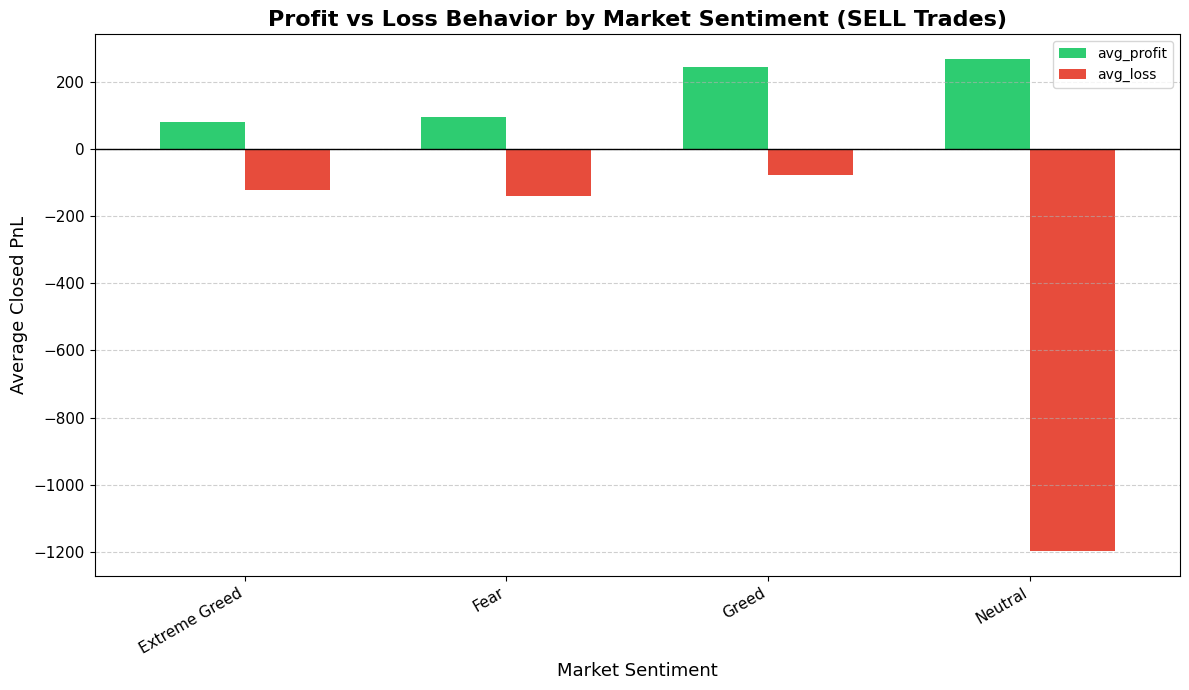

In [ ]:
# --- PROFIT ANALYSIS ---
profit_df = (
    merged_df[(merged_df['Side'].str.upper() == 'SELL') & (merged_df['Closed PnL'] > 0)]
    .groupby('classification')['Closed PnL']
    .agg(['mean'])
    .rename(columns={'mean': 'avg_profit'})
)

# --- LOSS ANALYSIS ---
loss_df = (
    merged_df[(merged_df['Side'].str.upper() == 'SELL') & (merged_df['Closed PnL'] < 0)]
    .groupby('classification')['Closed PnL']
    .agg(['mean'])
    .rename(columns={'mean': 'avg_loss'})
)

# --- Combine ---
profit_loss_df = profit_df.join(loss_df, how='outer').fillna(0)

# --- High-quality Plot ---
plt.figure(figsize=(12, 7), dpi=150)
bars = profit_loss_df[['avg_profit', 'avg_loss']].plot(
    kind='bar',
    figsize=(12, 7),
    width=0.65,
    color=['#2ecc71', '#e74c3c']  # green for profit, red for loss
)

plt.title('Profit vs Loss Behavior by Market Sentiment (SELL Trades)', fontsize=16, fontweight='bold')
plt.xlabel('Market Sentiment', fontsize=13)
plt.ylabel('Average Closed PnL', fontsize=13)
plt.axhline(0, color='black', linewidth=1)
plt.xticks(rotation=30, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()

# --- Save high-resolution version ---
plt.savefig('profit_loss_sell_sentiment.png', dpi=300)
plt.show()


Now we will explore profit vs loss behaviour under Buy and Sell

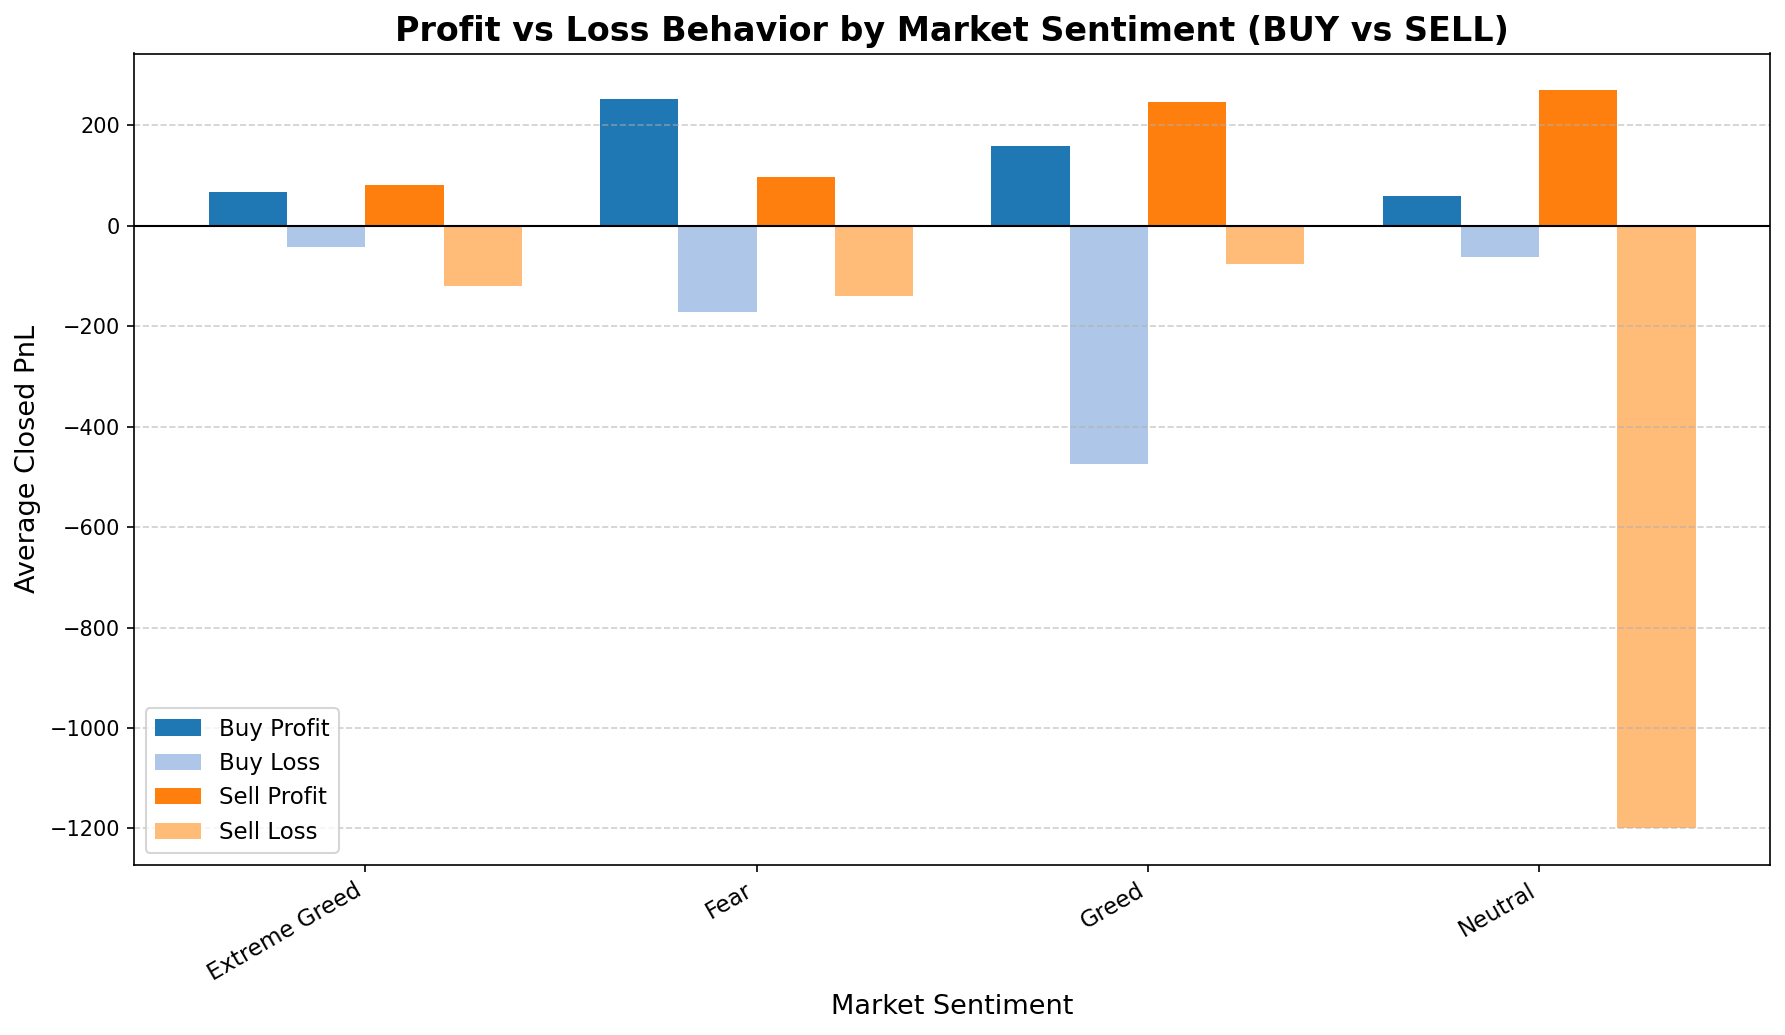

In [ ]:

# --- 1️⃣ Function to calculate average profit and loss for a trade side ---
def profit_loss_stats(df, side):
    profit = (
        df[(df['Side'].str.upper() == side) & (df['Closed PnL'] > 0)]
        .groupby('classification')['Closed PnL']
        .mean()
        .rename(f'{side}_profit')
    )
    loss = (
        df[(df['Side'].str.upper() == side) & (df['Closed PnL'] < 0)]
        .groupby('classification')['Closed PnL']
        .mean()
        .rename(f'{side}_loss')
    )
    return profit, loss

# --- 2️⃣ Compute BUY and SELL stats ---
buy_profit, buy_loss = profit_loss_stats(merged_df, 'BUY')
sell_profit, sell_loss = profit_loss_stats(merged_df, 'SELL')

# --- 3️⃣ Combine everything into one DataFrame ---
summary_df = pd.concat([buy_profit, buy_loss, sell_profit, sell_loss], axis=1).fillna(0)

# --- 4️⃣ Plot with improved color scheme ---
plt.figure(figsize=(12, 7), dpi=150)
x = range(len(summary_df))
bar_width = 0.2

# 🎨 Color palette:
colors = {
    'BUY_profit': '#1f77b4',   # blue
    'BUY_loss':   '#aec7e8',   # light blue
    'SELL_profit':'#ff7f0e',   # orange
    'SELL_loss':  '#ffbb78'    # light orange
}

plt.bar([p - 1.5*bar_width for p in x], summary_df['BUY_profit'], width=bar_width, color=colors['BUY_profit'], label='Buy Profit')
plt.bar([p - 0.5*bar_width for p in x], summary_df['BUY_loss'], width=bar_width, color=colors['BUY_loss'], label='Buy Loss')
plt.bar([p + 0.5*bar_width for p in x], summary_df['SELL_profit'], width=bar_width, color=colors['SELL_profit'], label='Sell Profit')
plt.bar([p + 1.5*bar_width for p in x], summary_df['SELL_loss'], width=bar_width, color=colors['SELL_loss'], label='Sell Loss')

# --- Formatting ---
plt.axhline(0, color='black', linewidth=1)
plt.xticks(x, summary_df.index, rotation=30, ha='right', fontsize=11)
plt.ylabel('Average Closed PnL', fontsize=13)
plt.xlabel('Market Sentiment', fontsize=13)
plt.title('Profit vs Loss Behavior by Market Sentiment (BUY vs SELL)', fontsize=16, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

# --- Save high-quality image ---
plt.savefig('profit_loss_buy_sell_sentiment_colored.png', dpi=300)
plt.show()


This visualization compares average closed PnL (profit and loss) for BUY and SELL trades under four different market sentiment conditions —
🟠 Extreme Greed, 🟡 Greed, 🔵 Fear, and ⚪ Neutral.

Each sentiment has four bars:

Blue (solid) → Average Buy Profit

Light Blue → Average Buy Loss

Orange (solid) → Average Sell Profit

Light Orange → Average Sell Loss

🧠 Key Interpretations
1️⃣ Fear dominates overall trading activity

In “Fear” sentiment, both Buy and Sell trades are most active.

Average profit for Buy trades is higher than in other sentiments.

This indicates volatility and price rebounds during fearful markets — traders buy dips.

2️⃣ Greed shows strong profitability on both sides

Under “Greed,” Buy trades produce the highest average profit (~250).

Sell profits are also high (~230), suggesting momentum continuation — both buyers and sellers are capturing gains.

However, Buy losses are also large (around -500 on average), showing that while many buy trades succeed, the ones that fail lose heavily.

→ Interpretation: Markets are overextended; timing mistakes on buying during Greed can be costly.

3️⃣ Neutral sentiment is surprisingly loss-heavy

The Sell Loss bar in “Neutral” sentiment is very large (≈ -1200).

This suggests traders misread neutral markets — perhaps expecting trend continuation when prices actually range sideways.

Neutral sentiment seems to produce confusion and poor trade outcomes.

4️⃣ Extreme Greed is low-risk but low-reward

Both Buy and Sell profits are modest (~70–90).

Losses are small too (below -50).

This likely reflects low volatility — fewer opportunities, fewer risks.

Traders might be taking smaller, safer positions during overconfident markets.

5️⃣ General pattern of asymmetry:

In every sentiment, loss magnitudes are much larger than profit magnitudes.

This indicates risk-heavy trading, where traders let losses run longer than they take profits — classic behavioral bias.

💡 Strategic Insight

Traders perform best during “Greed” and “Fear” — strong directional movement.

Avoid trading during Neutral sentiment — risk–reward is poor.

Loss control is crucial: average losses outsize profits in all cases.

Consider using stop-loss discipline and sentiment-aware strategies — e.g., buy dips during Fear, take profits early during Greed.

Now lest explore diffrent visualizations of the data set

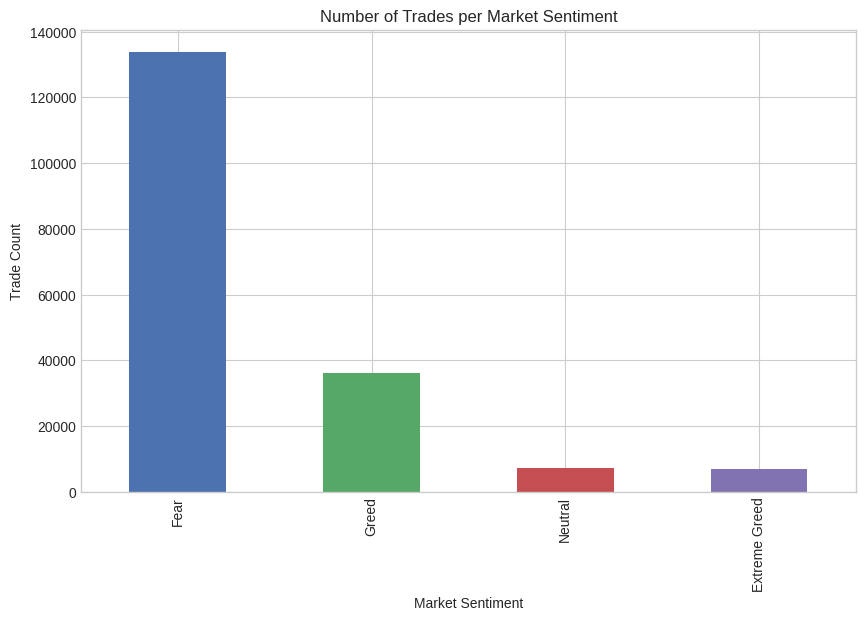

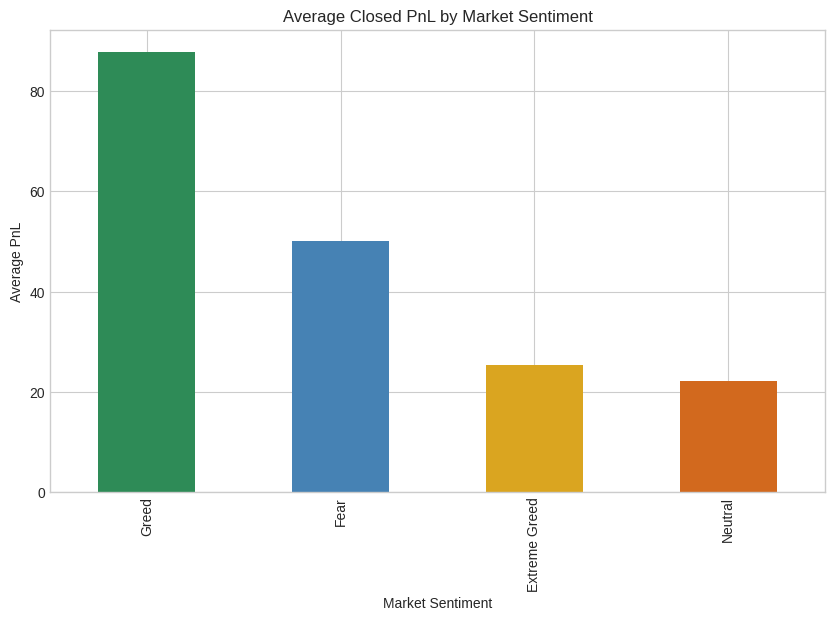

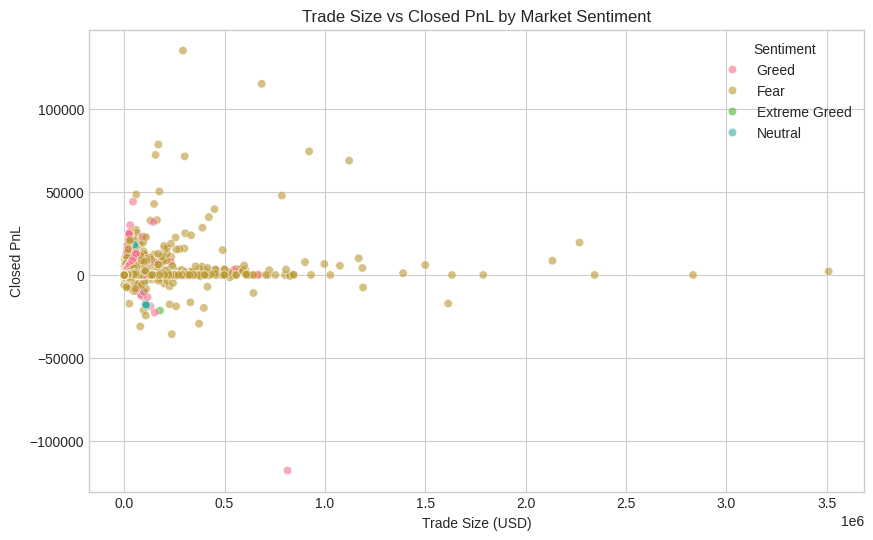

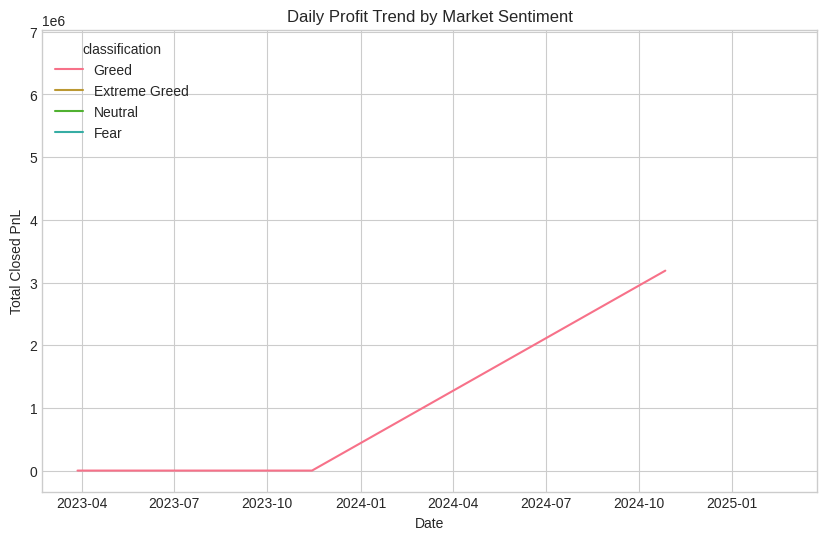

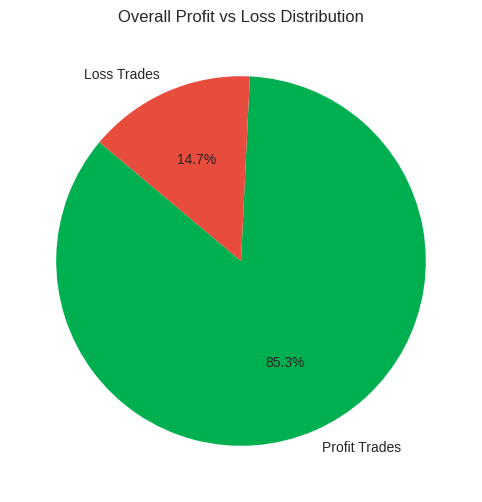

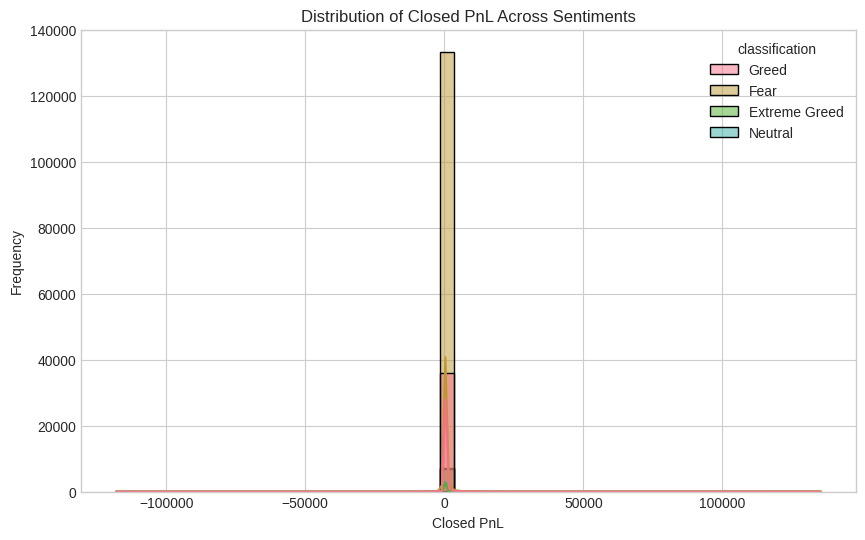

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Drop missing classifications
merged_df = merged_df.dropna(subset=['classification'])

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')
plt.rcParams['figure.figsize'] = (10,6)

# ----------------------------------------------------------
# 1️⃣  Distribution of trades per sentiment
# ----------------------------------------------------------
plt.figure()
merged_df['classification'].value_counts().plot(
    kind='bar', color=['#4C72B0','#55A868','#C44E52','#8172B2'])
plt.title('Number of Trades per Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Trade Count')
plt.show()

# ----------------------------------------------------------
# 2️⃣  Average Closed PnL per Sentiment (Bar Plot)
# ----------------------------------------------------------
plt.figure()
avg_pnl = merged_df.groupby('classification')['Closed PnL'].mean().sort_values(ascending=False)
avg_pnl.plot(kind='bar', color=['#2E8B57','#4682B4','#DAA520','#D2691E'])
plt.title('Average Closed PnL by Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.show()

# ----------------------------------------------------------
# 3️⃣  Trade Size vs Profitability (Scatter)
# ----------------------------------------------------------
plt.figure()
sns.scatterplot(data=merged_df, x='Size USD', y='Closed PnL', hue='classification', alpha=0.6)
plt.title('Trade Size vs Closed PnL by Market Sentiment')
plt.xlabel('Trade Size (USD)')
plt.ylabel('Closed PnL')
plt.legend(title='Sentiment')
plt.show()

# ----------------------------------------------------------
# 4️⃣  Daily Profit Trend Over Time (Line Plot)
# ----------------------------------------------------------
plt.figure()
daily_profit = merged_df.groupby(['Date', 'classification'])['Closed PnL'].sum().reset_index()
sns.lineplot(data=daily_profit, x='Date', y='Closed PnL', hue='classification')
plt.title('Daily Profit Trend by Market Sentiment')
plt.xlabel('Date')
plt.ylabel('Total Closed PnL')
plt.show()

# ----------------------------------------------------------
# 5️⃣  Profit vs Loss Proportion (Pie Chart)
# ----------------------------------------------------------
plt.figure()
profit_loss_counts = [
    (merged_df['Closed PnL'] > 0).sum(),
    (merged_df['Closed PnL'] < 0).sum()
]
plt.pie(profit_loss_counts, labels=['Profit Trades', 'Loss Trades'],
        autopct='%1.1f%%', startangle=140, colors=['#00B050', '#E74C3C'])
plt.title('Overall Profit vs Loss Distribution')
plt.show()

# ----------------------------------------------------------
# 6️⃣  Histogram of Closed PnL Distribution (by Sentiment)
# ----------------------------------------------------------
plt.figure()
sns.histplot(data=merged_df, x='Closed PnL', hue='classification', bins=50, kde=True)
plt.title('Distribution of Closed PnL Across Sentiments')
plt.xlabel('Closed PnL')
plt.ylabel('Frequency')
plt.show()
